Global surface temperature has increased ≈ 0.2°C per decade in the last 30 years. (Global temperature change: Hansen, James, September 26, 2006) Year after year a new scientific report releases desribing the unsustainability and the horrific effects on the globe of this increase in global temperatures. As more and more people, politicians, governments, and firms around the world starts to realize this, the more focus has shifted onto green- and nuclear energy and less onto fossil fuels. In 2015 the UN set 17 world goals for sustainable development, one of these goals, goal number 7, goes like this: ''Ensure access to affordable, reliable, sustainable, and modern energy for all'' (UN, 2015)
In this paper we, via data from the World Bank, analyse and desribe one of the targets/indicators of the 7'th world goal: ''By 2030, increase substantially the share of renewable energy in the global energy mix''. We do this by analyzing the electricity production from respectively renewable- and nuclear energy and compare it to electricity production from fossil fuels. We do this for the richer, developed regions of North America and the European Union and then compare it to the poorer and less-developed regions of Sub-Saharan Africa, and Latin America and the Caribbean.
Our findings is that the European Union has seen a rapid increase in electricity production from both nuclear- and renewable energy, and even more so for nuclear energy, and a drastic fall in electricity production from fossil fuels, while Sub-Saharan Africa, North America and Latin America and the Caribbean have only recently started to see an improvement over the time span and are lacking behind the EU. All in all we come to the conclusion that world goal 7 from the UN is far from being reached

# Importing the libraries

In [1]:
#We start off with importing the modules and libraries
from pandas_datareader import wb # import WB API
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Electricity Production from Renewable Energy (as % of total)

## Importing and Data Cleaning

In [2]:
#the code to clean up the dataframe for electricity production from renewable energy
from pandas_datareader import wb
wb_rnwx = wb.download(indicator='EG.ELC.RNWX.ZS', country=['EUU', 'NAC', 'SSA', 'TLA'], start=1975, end=2015)
wb_rnwx = wb_rnwx.rename(columns = {'EG.ELC.RNWX.ZS':'elec_prod_from_renewable_energy'})
wb_rnwx = wb_rnwx.reset_index() #reset the index so EUU is first
wb_rnwx.year = wb_rnwx.year.astype(int)
wb_rnwx.country = wb_rnwx.country.astype('string')
wb_rnwx = wb_rnwx.sort_values(['country','year']) #sorts by country and then year
wb_rnwx.dropna() #drops all the values that says NaN

/Users/lucasbillot/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EUU, NAC, SSA, TLA
  warnings.warn(


,country,year,elec_prod_from_renewable_energy
40,European Union,1975,0.558944
39,European Union,1976,0.513907
38,European Union,1977,0.519714
37,European Union,1978,0.522394
36,European Union,1979,0.507560
...,...,...,...
86,Sub-Saharan Africa (excluding high income),2011,0.670913
85,Sub-Saharan Africa (excluding high income),2012,0.730265
84,Sub-Saharan Africa (excluding high income),2013,0.856317
83,Sub-Saharan Africa (excluding high income),2014,1.701720


## Summary statistics

In [3]:
wb_rnwx.describe()

,year,elec_prod_from_renewable_energy
count,164.000000,164.000000
mean,1995.000000,2.191722
std,11.868399,2.943473
min,1975.000000,0.118038
25%,1985.000000,0.464843
50%,1995.000000,1.380155
75%,2005.000000,2.505018
max,2015.000000,18.041960


ADD text here

## The Figure for Renewable Energy

In [4]:
import ipywidgets as widgets
def plot_wb(wb_rnwx, country): 
    I = wb_rnwx['country'] == country
    ax = wb_rnwx.loc[I,:].plot(x='year', y='elec_prod_from_renewable_energy', style='-o', legend=False)
    ax.set_ylabel('% of total')
    ax.set_title('Figure 2.1:' ' ' 'Electricity production from renewable energy') 
    ax.set_xlim(1975, 2015)

In [5]:
widgets.interact(plot_wb, 
    wb_rnwx = widgets.fixed(wb_rnwx),
    country = widgets.Dropdown(description='Country', 
                                    options=wb_rnwx.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

In figure 2.1 we see an increase in electricity production from renewable energy for the European Union and North America by respectively 17,5 %-points and 7%-point, showing that the European Union is leading the race in electricity production from renewable sources. Sub-Saharan Africa has only recently, from ca. 2012 started seing an increase in electricity production from renewable energy, with a rise of about 1,5%-point of total production. Most suprisingly, Latin America and the Caribbean has had the same rise in %-points over the period as North America, only difference being that their switch to renewable energy started later, in 2000.

# Electricity Production from Nuclear Energy (as % of total)

## Importing and Data Cleaning

In [6]:
#this time the code is for electricity production from nuclear energy
from pandas_datareader import wb
wb_nucl = wb.download(indicator='EG.ELC.NUCL.ZS', country=['EUU', 'NAC', 'SSA', 'TLA'], start=1975, end=2015)
wb_nucl = wb_nucl.rename(columns = {'EG.ELC.NUCL.ZS':'elec_prod_from_nuclear_energy'})
wb_nucl = wb_nucl.reset_index()
wb_nucl.year = wb_nucl.year.astype(int)
wb_nucl.country = wb_nucl.country.astype('string')
wb_nucl = wb_nucl.sort_values(['country','year'])
wb_nucl.dropna()

/Users/lucasbillot/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EUU, NAC, SSA, TLA
  warnings.warn(


,country,year,elec_prod_from_nuclear_energy
40,European Union,1975,5.654875
39,European Union,1976,6.064906
38,European Union,1977,7.241884
37,European Union,1978,8.233095
36,European Union,1979,8.863022
...,...,...,...
87,Sub-Saharan Africa (excluding high income),2010,2.794873
86,Sub-Saharan Africa (excluding high income),2011,3.038803
85,Sub-Saharan Africa (excluding high income),2012,2.682724
84,Sub-Saharan Africa (excluding high income),2013,3.104398


## Summary statistics

In [7]:
wb_nucl.describe()

,year,elec_prod_from_nuclear_energy
count,164.000000,163.000000
mean,1995.000000,11.958706
std,11.868399,11.363315
min,1975.000000,0.000000
25%,1985.000000,2.407216
50%,1995.000000,5.654875
75%,2005.000000,19.017553
max,2015.000000,33.812418


ADD text here

## The Figure for Nuclear Energy

In [8]:
#We make the figures interactive
import ipywidgets as widgets
def plot_wb(wb_nucl, country): 
    I = wb_nucl['country'] == country
    ax=wb_nucl.loc[I,:].plot(x='year', y='elec_prod_from_nuclear_energy', style='-o', legend=False)
    ax.set_ylabel('% of total')
    ax.set_title('Figure 3.1:' ' ' 'Electricity production from nuclear energy') 
    ax.set_xlim(1975, 2015)

In [9]:
widgets.interact(plot_wb, 
    wb_nucl = widgets.fixed(wb_nucl),
    country = widgets.Dropdown(description='Country', 
                                    options=wb_nucl.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

### Figure of renewable energy compared to nuclear energy

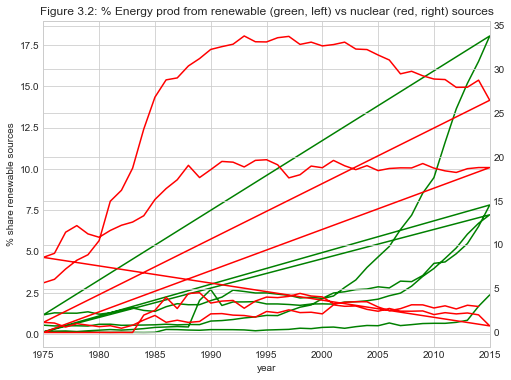

In [40]:
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(wb_rnwx.year, wb_rnwx.elec_prod_from_renewable_energy, color='green')
ax.set_xlabel("year",fontsize=10)
ax2=ax.twinx()
ax2.plot(wb_nucl.year, wb_nucl.elec_prod_from_nuclear_energy, color='red')
ax.set_ylabel('% share renewable sources')
ax.set_xlabel('year')
ax.set_xlim(1975,2015)
ax.set_title('Figure 3.2: % Energy prod from renewable (green, left) vs nuclear (red, right) sources')
plt.show()

ADD text here

# Electricity Production from Fossil Fuels (as % of total)

## Importing and Data Cleaning

In [12]:
# load wb data for energy production from fossil fuels 1975-2015
wb_fosl = wb.download(indicator='EG.ELC.FOSL.ZS', country=['EUU','NAC','SSA','TLA'], start=1975, end=2015)
wb_fosl = wb_fosl.rename(columns = {'EG.ELC.FOSL.ZS':'fosl'})
wb_fosl.reset_index(inplace = True)
wb_fosl.year = wb_fosl.year.astype(int)
wb_fosl.country = wb_fosl.country.astype(str)
wb_fosl = wb_fosl.sort_values(['country', 'year'])
wb_fosl.dropna() #drop all missing values
wb_fosl.reset_index(inplace=True, drop=True)

/Users/lucasbillot/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EUU, NAC, SSA, TLA
  warnings.warn(


## Summary Statistics

In [13]:
wb_fosl.describe()

,year,fosl
count,164.000000,164.000000
mean,1995.000000,55.691065
std,11.868399,13.805352
min,1975.000000,28.929759
25%,1985.000000,42.746090
50%,1995.000000,62.811625
75%,2005.000000,67.294690
max,2015.000000,74.799558


ADD text here

## Figure for Fossil Fuels

In [34]:
import ipywidgets as widgets
def plot_wb(wb_fosl, country): 
    I = wb_fosl['country'] == country
    ax=wb_fosl.loc[I,:].plot(x='year', y='fosl', style='-o', legend=False)
    ax.set_ylabel('% of total')
    ax.set_xlim(1975,2015)
    ax.set_title('Figure 4.1: Energy production from fossil fuels 1975-2015')

In [35]:
widgets.interact(plot_wb, 
    wb_fosl = widgets.fixed(wb_fosl),
    country = widgets.Dropdown(description='Country', 
                                    options=wb_fosl.country.unique(), 
                                    value='European Union')
);

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

ADD text here

### Figure of fossil fuels compared to renewable energy

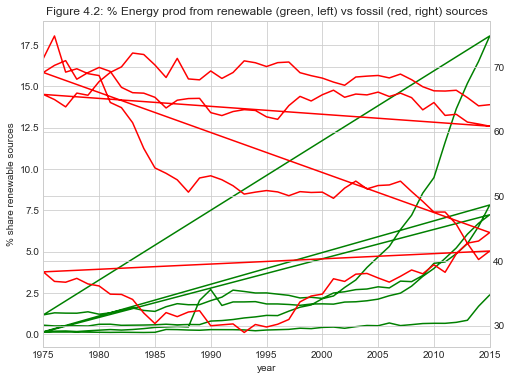

In [41]:
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(wb_rnwx.year, wb_rnwx.elec_prod_from_renewable_energy, color='green')
ax.set_xlabel("year",fontsize=10)
ax2=ax.twinx()
ax2.plot(wb_fosl.year, wb_fosl.fosl, color='red')
ax.set_ylabel('% share renewable sources')
ax.set_xlabel('year')
ax.set_xlim(1975,2015)
ax.set_title('Figure 4.2: % Energy prod from renewable (green, left) vs fossil (red, right) sources')
plt.show()

ADD text here?

# Merging of the Datasets to Calculate the %-point Difference in Production

In [17]:
#We make a copy of the above datasets just in case, and then we merge, first for nuclear- and renewable energy
wb = pd.merge(wb_nucl, wb_rnwx, on=['country', 'year'], how='left')
wb.rename(columns={'elec_prod_from_nuclear_energy':'e'}, inplace=True)
wb.rename(columns={'elec_prod_from_renewable_energy':'r'}, inplace=True)

In [18]:
#Then we merge for renewable energy and fossil fuels
wb2 = pd.merge(wb_fosl, wb_rnwx, on=['country', 'year'], how='left')
wb2.dropna()
wb2.rename(columns={'fosl':'f'}, inplace=True)
wb2.rename(columns={'elec_prod_from_renewable_energy':'re'}, inplace=True)

## The Calculation

In [19]:
wb['prod_diff'] = wb.e - wb.r #we calculate the difference between the above datasets in percentage-points
wb2['prod_diff2'] = wb2.f - wb2.re

## The Interactive Figure Showing the %-point Difference

In [20]:
#Figure showing the %-point difference for renewable- and nuclear energy
import ipywidgets as widgets
def plot_wb(wb, country): 
    I = wb['country'] == country
    ax = wb.loc[I,:].plot(x='year', y='prod_diff', style='-o', legend=False)
    ax.set_ylabel('%-point difference of total production')
    ax.set_title('Figure 4.1:' ' ' '%-point difference in electricity production') 
    ax.set_xlim(1975, 2015)

In [21]:
widgets.interact(plot_wb, 
    wb = widgets.fixed(wb),
    country = widgets.Dropdown(description='Country', 
                                    options=wb.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

ADD text here

In [22]:
#Figure showing the %-point difference between renewable energy and fossil fuels
import ipywidgets as widgets
def plot_wb(wb2, country): 
    I = wb2['country'] == country
    ax = wb2.loc[I,:].plot(x='year', y='prod_diff2', style='-o', legend=False)
    ax.set_xlim(1975,2015)
    ax.set_ylabel('%-point difference of total energy production')

In [23]:
widgets.interact(plot_wb, 
    wb2 = widgets.fixed(wb2),
    country = widgets.Dropdown(description='Country', 
                                    options=wb2.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

ADD text here

# Electricity Production from Renewable Energy (in kwh)

## Importing and Data Cleaning

In [24]:
#here the dataset is elecetricity production from renewable energy, but this time in kwh
from pandas_datareader import wb
wb_rnwx_kwh = wb.download(indicator='EG.ELC.RNWX.KH', country=['EUU', 'NAC', 'SSA', 'TLA'], start=1975, end=2015)
#wb_rnwx_kwh = wb_rnwx_kwh.rename(columns = {'EG.ELC.RNWX.KH':'elec_prod_from_renewable_energy_in_kwh'})
wb_rnwx_kwh = wb_rnwx_kwh.reset_index()
wb_rnwx_kwh.year = wb_rnwx_kwh.year.astype(int)
wb_rnwx_kwh.country = wb_rnwx_kwh.country.astype('string')
wb_rnwx_kwh = wb_rnwx_kwh.sort_values(['country','year'])
wb_rnwx_kwh.dropna()
wb_rnwx_kwh.rename(columns={'EG.ELC.RNWX.KH':'e_in_kwh'}, inplace=True) #just for shorter code
wb_rnwx_kwh['e_in_kwh_thousand'] = wb_rnwx_kwh['e_in_kwh']/1000000 #again because it's easier to read in the graph

/Users/lucasbillot/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EUU, NAC, SSA, TLA
  warnings.warn(


## Split-apply-combine

In [25]:
#now we to the split-apply-combine on the above datasets
wb_rnwx_kwh_ = wb_rnwx_kwh.copy()

wb_rnwx_kwh_mean = wb_rnwx_kwh_.groupby('country')['e_in_kwh_thousand'].agg('mean') # spliting and apllying in one swoop

wb_rnwx_kwh_mean.name = 'wb_rnwx_kwh_mean'
wb_rnwx_kwh_ = wb_rnwx_kwh_.set_index('country').join(wb_rnwx_kwh_mean, how='left') # combining
wb_rnwx_kwh_['demean'] = wb_rnwx_kwh_.e_in_kwh_thousand - wb_rnwx_kwh_.wb_rnwx_kwh_mean #we calculate the demean

## The Figures

### Electricity Production from Renewable Energy (in kwh)

Text(0.5, 1.0, 'Figure: 6.3.1: Electricity Production from Renewable Energy (in kwh)')

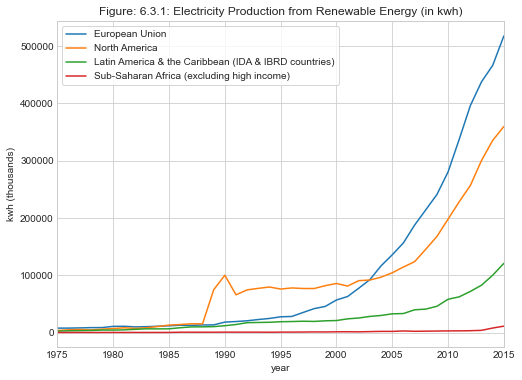

In [26]:
#we plot the figures from above, but this time not interactively
regions = ['European Union','North America','Latin America & the Caribbean (IDA & IBRD countries)', 'Sub-Saharan Africa (excluding high income)']

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

# Here we use the fact that the index has multiple levels (years) for an elegant loop
for i in regions:
    wb_rnwx_kwh_.xs(i).plot(x='year',y='e_in_kwh_thousand',ax=ax,label=i)

ax.legend(frameon=True)
ax.set_ylabel('kwh (thousands)')
ax.set_xlim(1975, 2015) #removes the space between the border and 2015/1975
ax.set_title('Figure: 6.3.1:'' ''Electricity Production from Renewable Energy (in kwh)')

### Difference in Electricity Production from Renewable Energy from the Mean Electricity Production

Text(0.5, 1.0, 'Figure 6.3.2: Difference in Production from the Mean Value')

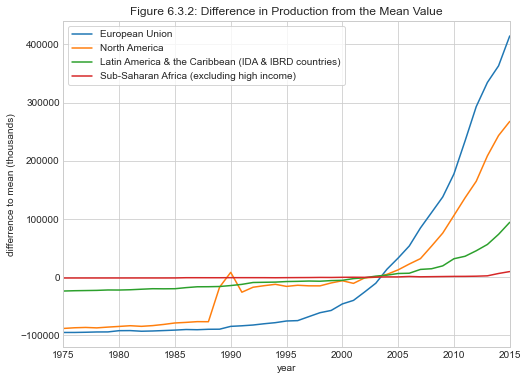

In [27]:
regions = ['European Union','North America','Latin America & the Caribbean (IDA & IBRD countries)', 'Sub-Saharan Africa (excluding high income)']

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

# Here we use the fact that the index has multiple levels (years) for an elegant loop
for i in regions:
    wb_rnwx_kwh_.xs(i).plot(x='year',y='demean',ax=ax,label=i)

ax.legend(frameon=True)
ax.set_ylabel('differrence to mean (thousands)')
ax.set_xlim(1975, 2015)
ax.set_title('Figure 6.3.2:' ' ' 'Difference in Production from the Mean Value')

ADD text for the two figures here

From the figure above, we observe that across regions, the share of total energy production from renewable sources has steadily increased since the 1970s, with the exception of Latin America and the Carribbean. Indeed, the latter shows an increasing trend in energy production from fossil fuels. This is in line with observations in covered in the news (https://dialogochino.net/en/climate-energy/43661-latin-america-continues-expansion-of-fossil-fuels-despite-climate-change/). The trend of increasing use of renewable sources is represented by the converging difference. Notably, the EU has the highest % share of energy production from renewables and the SSA the lowest. In sum, the challenge of equal access to clean and affordable energy stipulated by SDG 7 remains highly challenged. "